In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
import os
random.seed(5026)
target = np.sort([0] + random.sample(range(1, 69), 25))
num = []
for i in target:
    files = os.listdir(os.path.join("PIE", str(i)))
    n = len([j for j in files if j.endswith('.jpg')])
    num.append(n)
X = np.empty((sum(num), 32, 32))
y = np.empty((sum(num), 1))
for i, j in enumerate(target):
    for k, img_path in enumerate([f for f in os.listdir(os.path.join('PIE', str(j))) if f.endswith('.jpg')]):
        img_path = os.path.join('PIE', str(j), str(k+1)+'.jpg')
        X[sum(num[:i]) + k, :, :] = np.array(Image.open(img_path))
        y[sum(num[:i]) + k] = j
        
X_CMU = X[y.flatten() != 0, :, :]
y_CMU = y[y != 0]
X_self = X[y.flatten() == 0, :, :]
y_self = y[y == 0]

np.random.seed(42)
total_samples = len(X_CMU)
train_size = int(0.7 * total_samples)
train_indices = np.random.choice(total_samples, train_size, replace=False)
X_train_CMU = X_CMU[train_indices]
y_train_CMU = y_CMU[train_indices]
X_test_CMU = np.delete(X_CMU, train_indices, axis=0)
y_test_CMU = np.delete(y_CMU, train_indices, axis=0)
np.random.seed(42)
total_samples = len(X_self)
train_size = int(0.7 * total_samples)
train_indices = np.random.choice(total_samples, train_size, replace=False)
X_train_self = X_self[train_indices]
y_train_self = y_self[train_indices]
X_test_self = np.delete(X_self, train_indices, axis=0)
y_test_self = np.delete(y_self, train_indices, axis=0)
X_train = np.concatenate([X_train_CMU, X_train_self], axis = 0)
y_train = np.concatenate([y_train_CMU, y_train_self], axis = 0)
X_test = np.concatenate([X_test_CMU, X_test_self], axis = 0)
y_test = np.concatenate([y_test_CMU, y_test_self], axis = 0)

In [2]:
np.random.seed(526)
random_indice = np.random.choice(len(X_train), 500, replace = False)
X_LDA = X_train[random_indice]
y_LDA = y_train[random_indice]
X_LDA_reshape = X_LDA.reshape(500, -1)
mean = np.mean(X_LDA_reshape, axis = 0)
std = np.std(X_LDA_reshape, axis = 0)
X_LDA_normalize = (X_LDA_reshape - mean) / std

#### Visualize distribution of the sampled data (as in the PCA section) with dimensionality of 2

In [3]:
def LDA(X, y, n_components):
    class_means = np.array([np.mean(X[y == c], axis=0) for c in np.unique(y)])
    S_w = sum([np.cov(X[y == c], rowvar=False) for c in np.unique(y)])
    overall_mean = np.mean(X, axis=0)
    S_b = sum([len(X[y == c]) * (mean - overall_mean) @ (mean - overall_mean)
               for mean, c in zip(class_means, np.unique(y))])
    eigenvalues, eigenvectors = np.linalg.eigh(np.linalg.pinv(S_w).dot(S_b))
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    W = eigenvectors[:, :n_components]
    X_lda = X @ W
    return X_lda, class_means, W

In [4]:
X_LDA_2d, class_means, W = LDA(X_LDA_normalize, y_LDA.flatten(), 2)

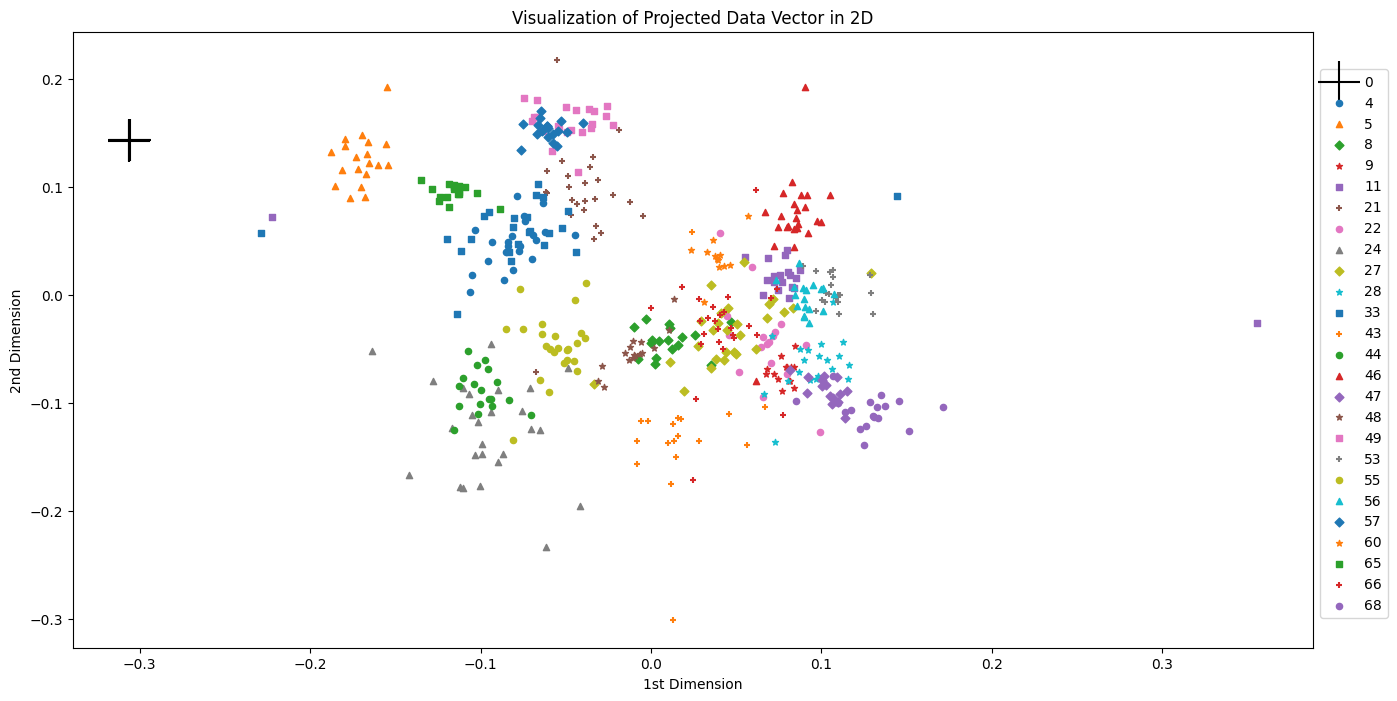

In [5]:
markers = ["+", "o", "^", "D", "*", "," ]
plt.figure(figsize = (16, 8))
for i, y in enumerate(np.unique(y_LDA)):
    if i == 0:
        marker_color = "black"
        size = 888
    else:
        marker_color = None
        size = 20
    x_data = X_LDA_2d[:, 0][y_LDA.flatten() == y]
    y_data = X_LDA_2d[:, 1][y_LDA.flatten() == y]
    plt.scatter(x_data, y_data, marker=markers[i % len(markers)], s = size, color = marker_color, label = int(y))
plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title("Visualization of Projected Data Vector in 2D")
plt.legend(bbox_to_anchor=(1, 0.95), loc = 'upper left')
plt.show()

#### Visualize distribution of the sampled data (as in the PCA section) with dimensionality of 3

In [6]:
from mpl_toolkits.mplot3d import Axes3D

In [7]:
X_LDA_3d, class_means, W = LDA(X_LDA_normalize, y_LDA.flatten(), 3)

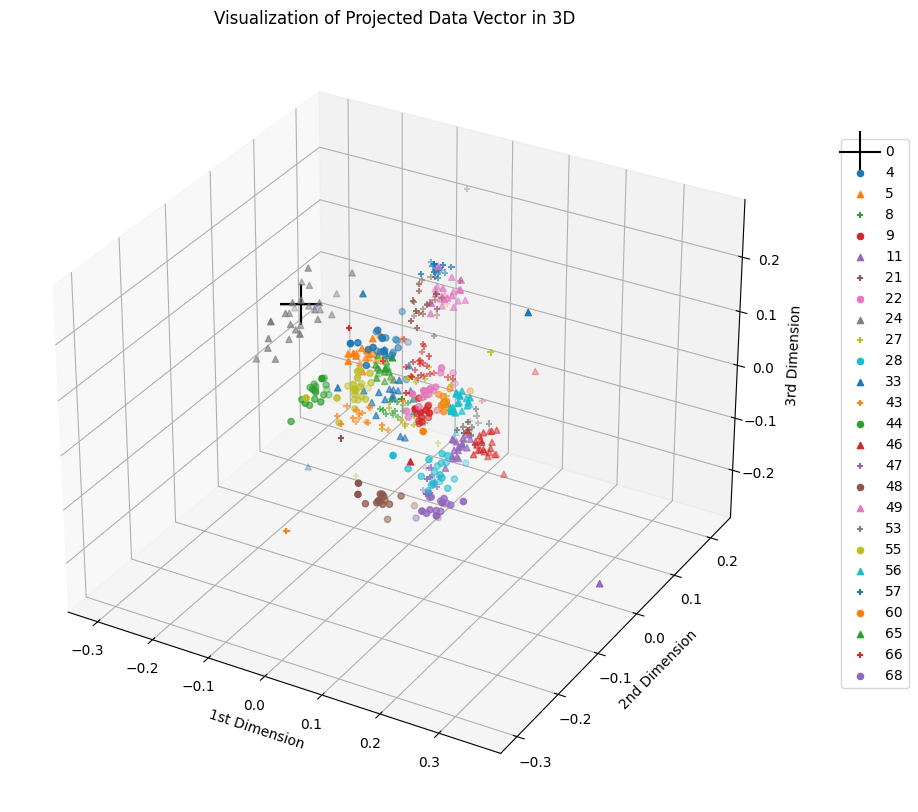

In [8]:
fig = plt.figure(1, figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection = "3d")
for i, y in enumerate(np.unique(y_LDA)):
    if i == 0:
        marker_color = "black"
        size = 888
    else:
        marker_color = None
        size = 20
    x_data = X_LDA_3d[list((y_LDA.flatten() == y)),:][:, 0]
    y_data = X_LDA_3d[list((y_LDA.flatten() == y)),:][:, 1]
    z_data = X_LDA_3d[list((y_LDA.flatten() == y)),:][:, 2]
    ax.scatter(x_data, y_data, z_data, marker=markers[i%3], s = size, color = marker_color, label = int(y))
ax.set_xlabel("1st Dimension")
ax.set_ylabel("2nd Dimension")
ax.set_zlabel("3rd Dimension")
ax.set_title("Visualization of Projected Data Vector in 3D")
ax.legend(bbox_to_anchor = (1.07, 0.87), loc='upper left')

#### Apply LDA to reduce data dimensionality from to 2, 3 and 9

In [9]:
# normalise it

X_train_reshape = X_train.reshape(X_train.shape[0], -1)
mean = np.mean(X_train_reshape, axis = 0)
std = np.std(X_train_reshape, axis = 0)
X_train_normalize = (X_train_reshape - mean) / std

In [10]:
X_train_CMU_reshape = X_train_CMU.reshape(X_train_CMU.shape[0], -1)
mean = np.mean(X_train_CMU_reshape, axis = 0)
std = np.std(X_train_CMU_reshape, axis = 0)
X_train_CMU_normalize = (X_train_CMU_reshape - mean) / std

In [11]:
X_train_self_reshape = X_train_self.reshape(X_train_self.shape[0], -1)
mean = np.mean(X_train_self_reshape, axis = 0)
std = np.std(X_train_self_reshape, axis = 0)
X_train_self_normalize = (X_train_self_reshape - mean) / std

In [12]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1)
mean = np.mean(X_test_reshape, axis = 0)
std = np.std(X_test_reshape, axis = 0)
X_test_normalize = (X_test_reshape - mean) / std

In [13]:
X_test_CMU_reshape = X_test_CMU.reshape(X_test_CMU.shape[0], -1)
mean = np.mean(X_test_CMU_reshape, axis = 0)
std = np.std(X_test_CMU_reshape, axis = 0)
X_test_CMU_normalize = (X_test_CMU_reshape - mean) / std

In [14]:
X_test_self_reshape = X_test_self.reshape(X_test_self.shape[0], -1)
mean = np.mean(X_test_self_reshape, axis = 0)
std = np.std(X_test_self_reshape, axis = 0)
X_test_self_normalize = (X_test_self_reshape - mean) / std

In [15]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNeighborsClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

def accuracy_score(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

In [16]:
def LDA(X, y, n_components):
    class_means = np.array([np.mean(X[y == c], axis=0) for c in np.unique(y)])
    S_w = sum([np.cov(X[y == c], rowvar = False) for c in np.unique(y)])
    overall_mean = np.mean(X, axis=0)
    S_b = sum([len(X[y == c]) * np.outer((mean - overall_mean), (mean - overall_mean))
               for mean, c in zip(class_means, np.unique(y))])
    eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    W = eigenvectors[:, :n_components]
    X_lda = X.dot(W)
    return X_lda, class_means, W

In [17]:
def lda_transform(X, means, w):
    #centered_data = X - means
    transformed_data = np.dot(X, w)
    return transformed_data

In [18]:
for n in [2, 3, 9]:
    print(f"{n} dimension")
    
    x_train_nd, class_means, W = LDA(X_train_normalize, y_train.flatten(), n) 
    x_test_nd = lda_transform(X_test_normalize, class_means, W)
    
    #x_train_CMU_nd, class_means, W = LDA(X_train_CMU_normalize, y_train_CMU.flatten(), n) 
    x_test_CMU_nd = lda_transform(X_test_CMU_normalize, class_means, W)
    
    #x_train_self_nd, class_means, W = LDA(X_train_self_normalize, y_train_self.flatten(), n)
    x_test_self_nd = lda_transform(X_test_self_normalize, class_means, W)
    
    cl = KNeighborsClassifier(n_neighbors = 50)
    cl.fit(x_train_nd, y_train.flatten())
    y_pred_CMU = cl.predict(x_test_CMU_nd)
    y_pred_self = cl.predict(x_test_self_nd)
    y_pred = cl.predict(x_test_nd)
    accuracy_CMU = accuracy_score(y_test_CMU.flatten(), y_pred_CMU)
    accuracy_self = accuracy_score(y_test_self.flatten(), y_pred_self)
    accuracy_all = accuracy_score(y_test.flatten(), y_pred)
    
    print (f"accuracy for the whole test dataset: {accuracy_all:.3f}")
    print(f"accuracy for CMU PIE dataset: {accuracy_CMU:.3f}")
    print(f"accuracy for selfies dataset: {accuracy_self:.3f}")
    print("------------")

2 dimension
accuracy for the whole test dataset: 0.455
accuracy for CMU PIE dataset: 0.453
accuracy for selfies dataset: 0.000
------------
3 dimension
accuracy for the whole test dataset: 0.628
accuracy for CMU PIE dataset: 0.626
accuracy for selfies dataset: 0.000
------------
9 dimension
accuracy for the whole test dataset: 0.913
accuracy for CMU PIE dataset: 0.915
accuracy for selfies dataset: 0.000
------------
